<a href="https://colab.research.google.com/github/sina-negarandeh/Automatic-Code-Summarization-via-Code-LLaMA/blob/main/Automatic_Code_Summarization_via_Code_LLaMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
import os
!unzip dataset.zip
os.chdir("/content/dataset")
# !wget https://zenodo.org/record/7857872/files/go.zip
# !wget https://zenodo.org/record/7857872/files/java.zip
# !wget https://zenodo.org/record/7857872/files/javascript.zip
# !wget https://zenodo.org/record/7857872/files/php.zip
!wget https://zenodo.org/record/7857872/files/python.zip
# !wget https://zenodo.org/record/7857872/files/ruby.zip

!unzip python.zip
# !unzip java.zip
# !unzip ruby.zip
# !unzip javascript.zip
# !unzip go.zip
# !unzip php.zip
!rm *.zip
!rm *.pkl

!python preprocess.py
!rm -r */final
os.chdir("../")

Archive:  dataset.zip
replace dataset/go/test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/go/test.txt     
  inflating: dataset/go/train.txt    
  inflating: dataset/go/valid.txt    
  inflating: dataset/java/test.txt   
  inflating: dataset/java/train.txt  
  inflating: dataset/java/valid.txt  
  inflating: dataset/javascript/test.txt  
  inflating: dataset/javascript/train.txt  
  inflating: dataset/javascript/valid.txt  
  inflating: dataset/php/test.txt    
  inflating: dataset/php/train.txt   
  inflating: dataset/php/valid.txt   
  inflating: dataset/preprocess.py   
  inflating: dataset/python/test.txt  
  inflating: dataset/python/train.txt  
  inflating: dataset/python/valid.txt  
  inflating: dataset/ruby/test.txt   
  inflating: dataset/ruby/train.txt  
  inflating: dataset/ruby/valid.txt  
--2024-12-21 02:23:34--  https://zenodo.org/record/7857872/files/python.zip
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Co

In [ ]:
import pandas as pd

train_path = '/content/dataset/python/train.jsonl'
valid_path = '/content/dataset/python/valid.jsonl'
test_path = '/content/dataset/python/test.jsonl'

df_train = pd.read_json(train_path, lines=True)
df_valid = pd.read_json(valid_path, lines=True)
df_test = pd.read_json(test_path, lines=True)

# EDA

In [ ]:
df_test.head()

,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url,partition
0,soimort/you-get,src/you_get/extractors/miomio.py,sina_xml_to_url_list,"def sina_xml_to_url_list(xml_data):\n """"""st...",python,"def sina_xml_to_url_list(xml_data):\n """"""st...","[def, sina_xml_to_url_list, (, xml_data, ), :,...",str->list\n Convert XML to URL List.\n F...,"[str, -, >, list, Convert, XML, to, URL, List,...",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test
1,soimort/you-get,src/you_get/extractors/dailymotion.py,dailymotion_download,"def dailymotion_download(url, output_dir='.', ...",python,"def dailymotion_download(url, output_dir='.', ...","[def, dailymotion_download, (, url, ,, output_...",Downloads Dailymotion videos by URL.,"[Downloads, Dailymotion, videos, by, URL, .]",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test
2,soimort/you-get,src/you_get/extractors/sina.py,sina_download,"def sina_download(url, output_dir='.', merge=T...",python,"def sina_download(url, output_dir='.', merge=T...","[def, sina_download, (, url, ,, output_dir, =,...",Downloads Sina videos by URL.,"[Downloads, Sina, videos, by, URL, .]",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test
3,soimort/you-get,src/you_get/util/log.py,sprint,"def sprint(text, *colors):\n """"""Format text...",python,"def sprint(text, *colors):\n """"""Format text...","[def, sprint, (, text, ,, *, colors, ), :, ret...",Format text with color or other effects into A...,"[Format, text, with, color, or, other, effects...",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test
4,soimort/you-get,src/you_get/util/log.py,print_log,"def print_log(text, *colors):\n """"""Print a ...",python,"def print_log(text, *colors):\n """"""Print a ...","[def, print_log, (, text, ,, *, colors, ), :, ...",Print a log message to standard error.,"[Print, a, log, message, to, standard, error, .]",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14918 entries, 0 to 14917
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   repo              14918 non-null  object
 1   path              14918 non-null  object
 2   func_name         14918 non-null  object
 3   original_string   14918 non-null  object
 4   language          14918 non-null  object
 5   code              14918 non-null  object
 6   code_tokens       14918 non-null  object
 7   docstring         14918 non-null  object
 8   docstring_tokens  14918 non-null  object
 9   sha               14918 non-null  object
 10  url               14918 non-null  object
 11  partition         14918 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [ ]:
df_test.isnull().sum()

,0
repo,0
path,0
func_name,0
original_string,0
language,0
code,0
code_tokens,0
docstring,0
docstring_tokens,0
sha,0


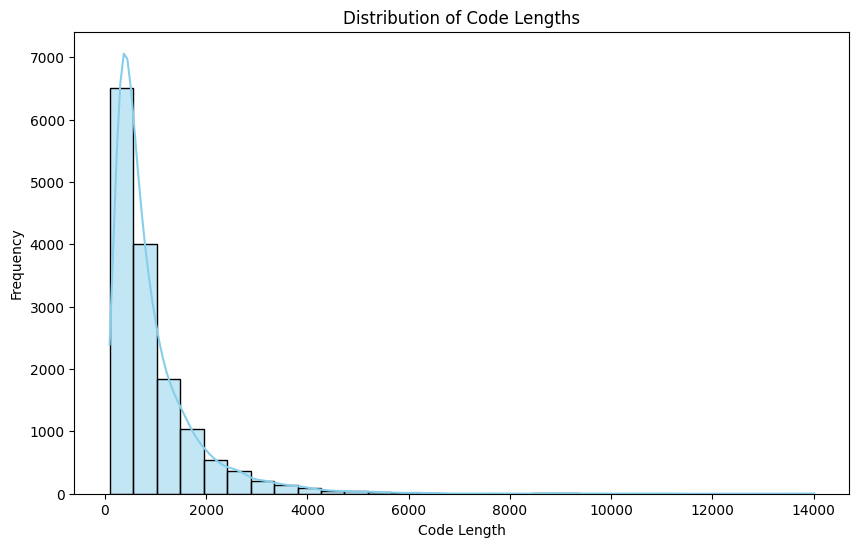

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each code snippet
df_test['code_length'] = df_test['code'].apply(len)

# Plot the distribution of code lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_test['code_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Code Lengths')
plt.xlabel('Code Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Two models:
# 7B Python specialist version: codellama/CodeLlama-7b-Python-hf
# 7B instruct-tuned version:    codellama/CodeLlama-7b-Instruct-hf

tokenizer = AutoTokenizer.from_pretrained("codellama/CodeLlama-7b-Python-hf")
model = AutoModelForCausalLM.from_pretrained("codellama/CodeLlama-7b-Python-hf")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


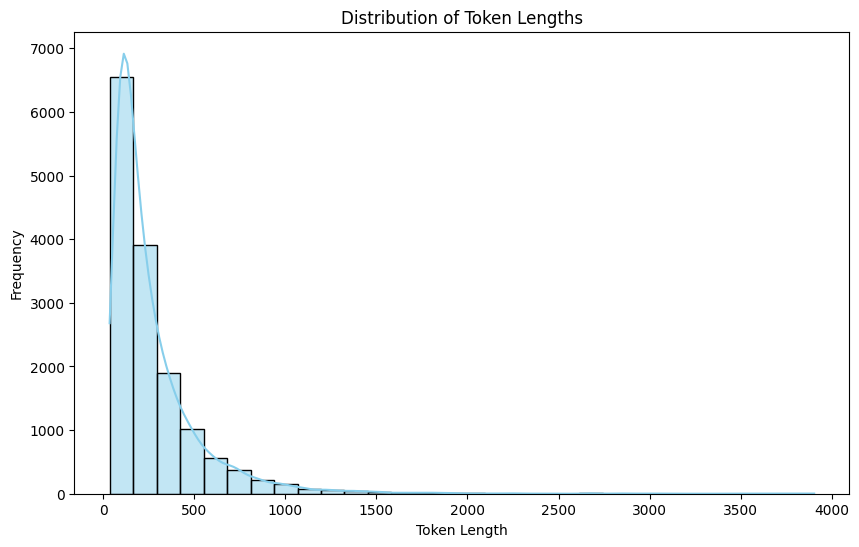

In [ ]:
# Calculate token length
df_test["token_length"] = df_test["code"].apply(lambda x: len(tokenizer(x, truncation=False)["input_ids"]))

# Plot the distribution of code lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_test['token_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.show()

# Code LLaMA

In [ ]:
import torch

def summarize_code(code_snippet):
    prompt = f"Please summarize the following Python code in one sentence, explaining its main functionality in natural language.\n\n{code_snippet}\n\nSummary:"
    inputs = tokenizer(prompt, return_tensors="pt")


    output = model.generate(
        inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=600,
        temperature=0.7,
        top_p=0.9,
        do_sample=True,
        pad_token_id=tokenizer.pad_token_id
    )
    summary = tokenizer.decode(output[0], skip_special_tokens=True)

    return summary.split("Summary:")[-1].strip()



# Example usage
code_snippet = """
def settext(self, text, cls='current'):
  self.replace(TextContent, value=text, cls=cls)
"""

print("Code Summary:", summarize_code(code_snippet))

In [ ]:
# Define the range of lengths to keep
min_length = 0
max_length = 50

# Filter rows based on token length
filtered_df = df_test[(df_test["token_length"] >= min_length) & (df_test["token_length"] <= max_length)]

# Display the filtered DataFrame
print("Filtered DataFrame:")
filtered_df

In [ ]:
import torch

def summarize_code(code_snippet):
    prompt = f"Please summarize the following Python code in one sentence, explaining its main functionality in natural language.\n\n{code_snippet}\n\nSummary:"
    inputs = tokenizer(prompt, return_tensors="pt")


    output = model.generate(
        inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=max_length+50, # pay attention to this it should be 50 tokens more than input for output
        temperature=0.7,
        top_p=0.9,
        do_sample=True,
        pad_token_id=tokenizer.pad_token_id
    )
    summary = tokenizer.decode(output[0], skip_special_tokens=True)

    return summary.split("Summary:")[-1].strip()

# Only for the first 20 rows
filtered_df['generated_comments'] = filtered_df['code'].iloc[:20].apply(summarize_code)


In [ ]:
filtered_df.head()

In [ ]:
filtered_df['generated_comments'].values

In [ ]:
filtered_df['docstring'].values

In [ ]:
filtered_df.iloc[:20].to_csv('filtered_df.csv')

# Prompts:

Intial prompts:
*   Please summarize the following Python code in one sentence, explaining its main functionality in natural language
*   In a clear and concise sentence, explain the main functionality of the following Python code
*   Summarize the following Python code in one sentence


Without specifying language:
*   Please summarize the following code in one sentence, explaining its main functionality in natural language
*   In a clear and concise sentence, explain the main functionality of the following code
*   Summarize the following code in one sentence


Different categories:
*   In-Context Learning
*   Chain of Thought (CoT)
*   Zero-Shot
*   Few-Shot
*   Instructive Templates
*   Plan-and-Solve



# Metrics
*   Lexical Similarity (Exact Word Overlap)
  *   Jaccard Similarity
  *   TF-IDF Cosine Similarity
*   Semantic Similarity (Meaning and Context)
  *   BERTScore
  *   Sentence Transformers (e.g., SBERT)
*   BLEU Score
*   ROUGE Score
*   METEOR Score

Lexical, Syntactic, Semantic Similarity


# BERTScore

In [68]:
!pip install bert-score

In [69]:
from bert_score import score

In [70]:
def calculate_bert_score(predictions, references):
  P, R, F1 = score(predictions, references, lang='en')

  avg_precision = sum(P) / len(P)
  avg_recall = sum(R) / len(R)
  avg_f1 = sum(F1) / len(F1)

  print("\nOverall BERTScore:")
  print(f"Average Precision = {avg_precision:.4f}")
  print(f"Average Recall = {avg_recall:.4f}")
  print(f"Average F1 = {avg_f1:.4f}")


In [71]:
!pip install evaluate rouge_score

In [73]:
from evaluate import load
import numpy as np

bleu = load("bleu")
rouge = load("rouge")
meteor = load("meteor")
bertscore = load("bertscore")

def calculate_evaluation_metrics(predictions, references):
  bleu_result = bleu.compute(predictions=predictions, references=[[ref] for ref in references])
  print("BLEU:", bleu_result)

  rouge_result = rouge.compute(predictions=predictions, references=references)
  print("ROUGE:", rouge_result)

  meteor_result = meteor.compute(predictions=predictions, references=references)
  print("METEOR:", meteor_result)

  bertscore_result = bertscore.compute(predictions=predictions, references=references, lang="en")
  print("BERTScore:", bertscore_result)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Sentence-BERT

In [74]:
!pip install sentence-transformers scipy


In [75]:
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
import numpy as np


model = SentenceTransformer('all-MiniLM-L6-v2')


def compute_sbert_similarity(predictions, references):
    prediction_embeddings = model.encode(predictions, convert_to_tensor=True)
    reference_embeddings = model.encode(references, convert_to_tensor=True)

    similarities = []
    for pred_embedding, ref_embedding in zip(prediction_embeddings, reference_embeddings):
        similarity = 1 - cosine(pred_embedding, ref_embedding)  # Cosine similarity is 1 - distance
        similarities.append(similarity)

    return similarities

def calculate_sbert_similarity(predictions, references):

  sbert_scores = compute_sbert_similarity(predictions, references)
  avg_sbert_scores = sum(sbert_scores) / len(sbert_scores)

  print("\nOverall SBERT Scores:")
  print(f"Average SBERT Score = {avg_sbert_scores:.4f}")

# Evaluation

## Eexample

In [76]:
# Example predictions and references (generated comments and original comments)
predictions = [
    "This function calculates the sum of two numbers.",
    "A function that adds two numbers together.",
    "This is a simple addition of two values."
]

references = [
    "Calculates the sum of two numbers.",
    "Adds two numbers and returns the result.",
    "Sum of two values is calculated here."
]

In [77]:
calculate_evaluation_metrics(predictions, references)
calculate_sbert_similarity(predictions, references)
calculate_bert_score(predictions, references)

BLEU: {'bleu': 0.3014965140843921, 'precisions': [0.5384615384615384, 0.34782608695652173, 0.25, 0.17647058823529413], 'brevity_penalty': 1.0, 'length_ratio': 1.1304347826086956, 'translation_length': 26, 'reference_length': 23}
ROUGE: {'rouge1': 0.6063492063492063, 'rouge2': 0.49145299145299143, 'rougeL': 0.5619047619047618, 'rougeLsum': 0.5619047619047618}
METEOR: {'meteor': 0.6633907575375829}


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore: {'precision': [0.9340165257453918, 0.8897286653518677, 0.9119085073471069], 'recall': [0.9183348417282104, 0.8915582895278931, 0.9071998596191406], 'f1': [0.926109254360199, 0.890642523765564, 0.9095481038093567], 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.47.1)'}

Overall SBERT Scores:
Average SBERT Score = 0.7439


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Overall BERTScore:
Average Precision = 0.9119
Average Recall = 0.9057
Average F1 = 0.9088


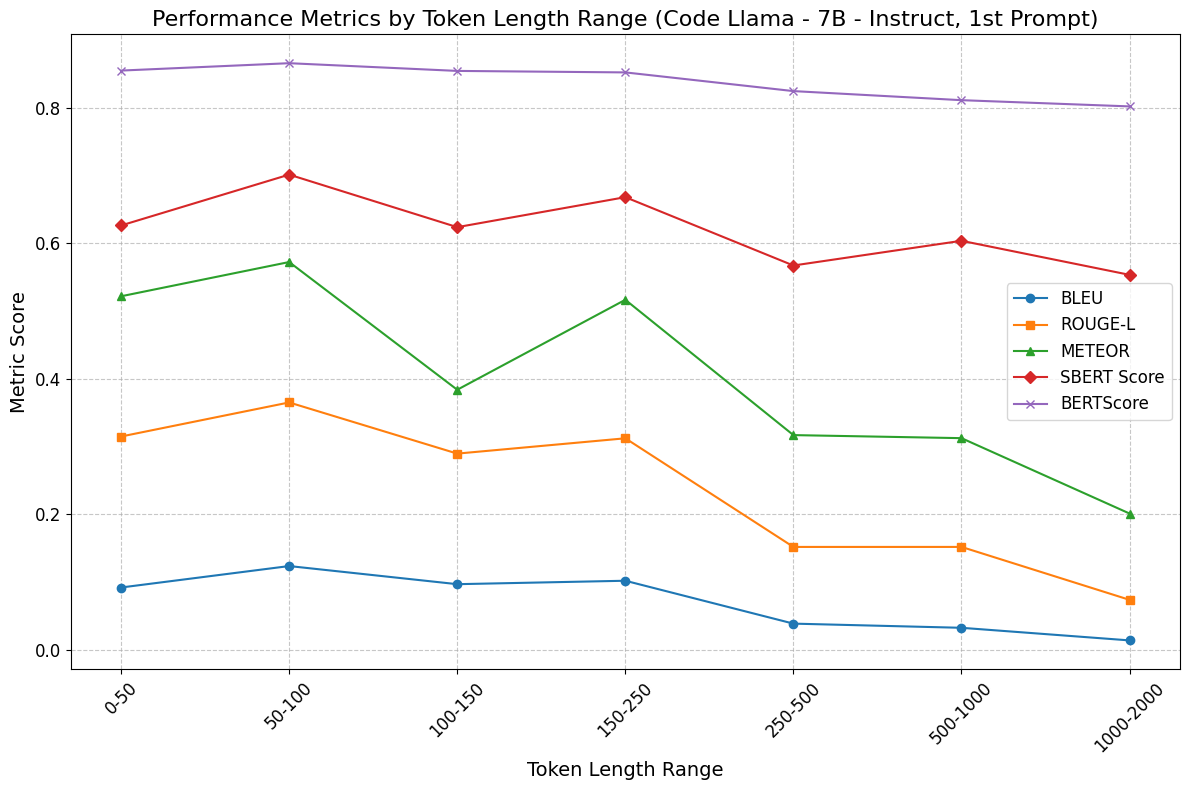

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Define the ranges and metrics
ranges = [
    "0-50",
    "50-100",
    "100-150",
    "150-250",
    "250-500",
    "500-1000",
    "1000-2000"
]

bleu = [
    0.0916887715391313,
    0.12336010966745718,
    0.09659122320149437,
    0.10166494302836848,
    0.03835057876878579,
    0.03219966272105157,
    0.013580169103158393
]

rouge_l = [
    0.3146179264410218,
    0.3649163878168051,
    0.2893714268432036,
    0.31198247405575136,
    0.15158200228496627,
    0.15160208263832867,
    0.07345824091486149
]

meteor = [
    0.5216767484325284,
    0.5722241957206096,
    0.38364040725604687,
    0.5164901823151598,
    0.31669682741500454,
    0.31219297803477397,
    0.20088448195750894
]

sbert = [
    0.6262,
    0.7013,
    0.6237,
    0.6680,
    0.5671,
    0.6036,
    0.5533
]

bertscore = [
    0.8549,
    0.8658,
    0.8544,
    0.8522,
    0.8246,
    0.8112,
    0.8020
]

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(ranges, bleu, marker='o', label="BLEU")
plt.plot(ranges, rouge_l, marker='s', label="ROUGE-L")
plt.plot(ranges, meteor, marker='^', label="METEOR")
plt.plot(ranges, sbert, marker='D', label="SBERT Score")
plt.plot(ranges, bertscore, marker='x', label="BERTScore")

plt.title("Performance Metrics by Token Length Range (Code Llama - 7B - Instruct, 1st Prompt)", fontsize=16)
plt.xlabel("Token Length Range", fontsize=14)
plt.ylabel("Metric Score", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


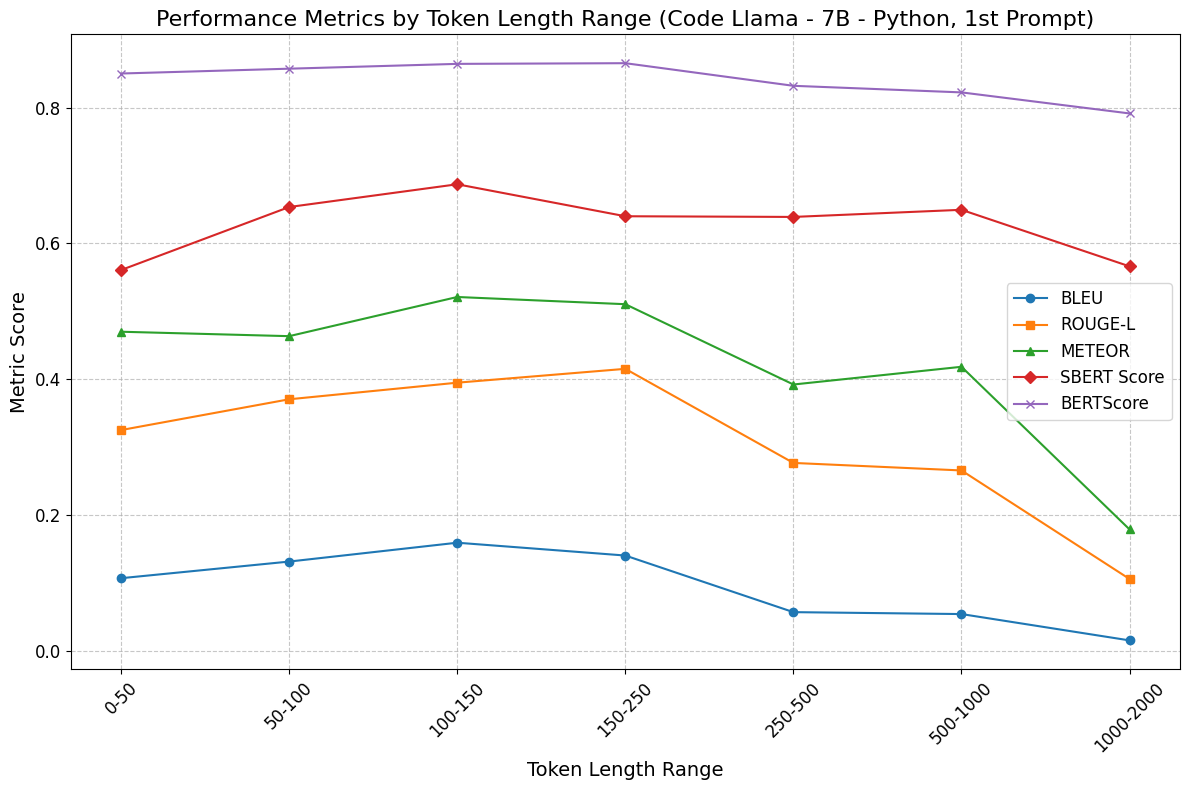

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Define the ranges and metrics
ranges = [
    "0-50",
    "50-100",
    "100-150",
    "150-250",
    "250-500",
    "500-1000",
    "1000-2000"
]

bleu = [
    0.10707711883561558,
    0.13157009158323213,
    0.1593504044016615,
    0.14045208587759547,
    0.05709530952179684,
    0.05427205966443808,
    0.015473645253137288
]

rouge_l = [
    0.32522785095587464,
    0.3705611808189666,
    0.3950064402854346,
    0.415395216078846,
    0.2768391046998754,
    0.26575346297470276,
    0.10587663480385275
]

meteor = [
    0.4700368477908167,
    0.46351170710139183,
    0.5212029701433308,
    0.510583080078781,
    0.3923213259016113,
    0.4184138080282008,
    0.17889590829304453
]

sbert = [
    0.5609,
    0.6537,
    0.6872,
    0.6401,
    0.6391,
    0.6496,
    0.5663
]

bertscore = [
    0.8503,
    0.8574,
    0.8645,
    0.8655,
    0.8322,
    0.8225,
    0.7915
]

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(ranges, bleu, marker='o', label="BLEU")
plt.plot(ranges, rouge_l, marker='s', label="ROUGE-L")
plt.plot(ranges, meteor, marker='^', label="METEOR")
plt.plot(ranges, sbert, marker='D', label="SBERT Score")
plt.plot(ranges, bertscore, marker='x', label="BERTScore")

plt.title("Performance Metrics by Token Length Range (Code Llama - 7B - Python, 1st Prompt)", fontsize=16)
plt.xlabel("Token Length Range", fontsize=14)
plt.ylabel("Metric Score", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

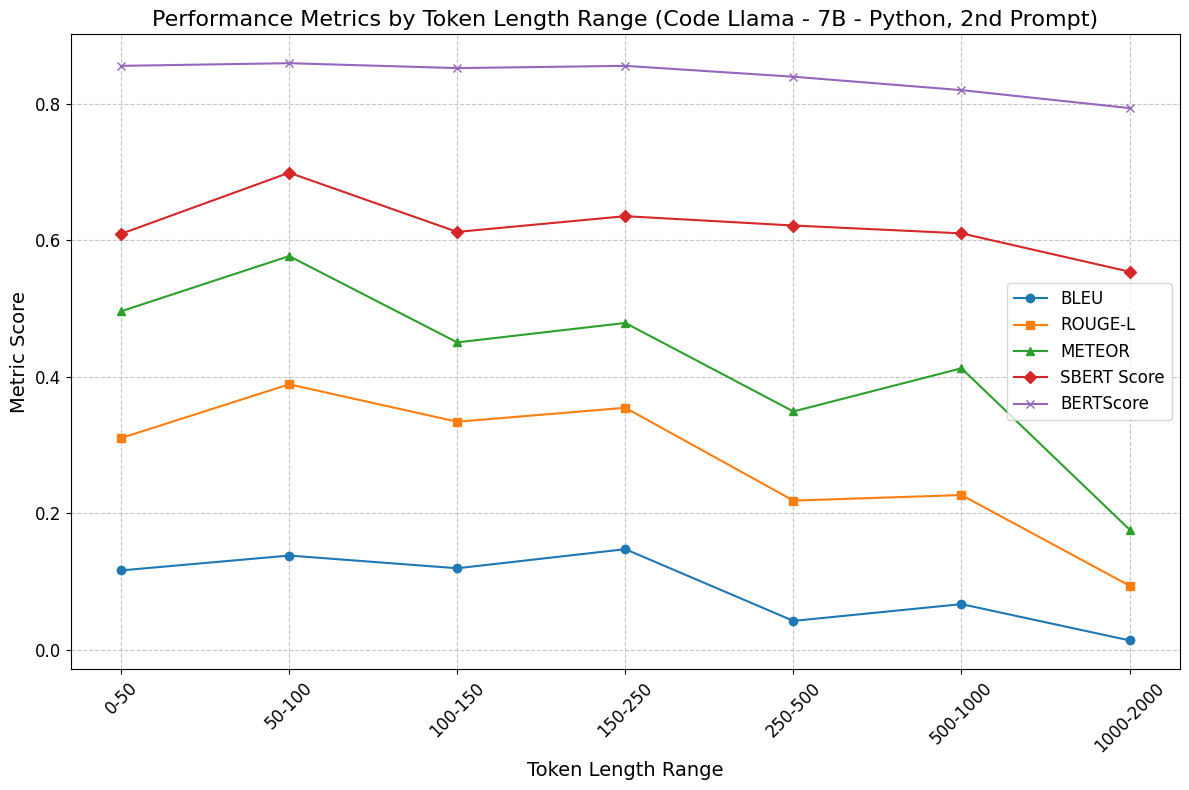

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Define the ranges and metrics
ranges = [
    "0-50",
    "50-100",
    "100-150",
    "150-250",
    "250-500",
    "500-1000",
    "1000-2000"
]

bleu = [
    0.11596669866091285,
    0.13777637475993995,
    0.1191511508854365,
    0.14712716306919923,
    0.04199907411913299,
    0.06656652930040924,
    0.013406489006692194
]

rouge_l = [
    0.3099433934151217,
    0.38875828819536307,
    0.3338966722382316,
    0.35438606608640477,
    0.2183215518528861,
    0.22644427303625303,
    0.09360617245327099
]

meteor = [
    0.49579083059398554,
    0.5766686538751044,
    0.45019699618927944,
    0.47868280984289874,
    0.34895876554260313,
    0.4122451370814753,
    0.17577898734659586
]

sbert = [
    0.6093,
    0.6989,
    0.6121,
    0.6352,
    0.6215,
    0.6100,
    0.5538
]

bertscore = [
    0.8555,
    0.8594,
    0.8522,
    0.8555,
    0.8396,
    0.8199,
    0.7936
]

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(ranges, bleu, marker='o', label="BLEU")
plt.plot(ranges, rouge_l, marker='s', label="ROUGE-L")
plt.plot(ranges, meteor, marker='^', label="METEOR")
plt.plot(ranges, sbert, marker='D', label="SBERT Score")
plt.plot(ranges, bertscore, marker='x', label="BERTScore")

plt.title("Performance Metrics by Token Length Range (Code Llama - 7B - Python, 2nd Prompt)", fontsize=16)
plt.xlabel("Token Length Range", fontsize=14)
plt.ylabel("Metric Score", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

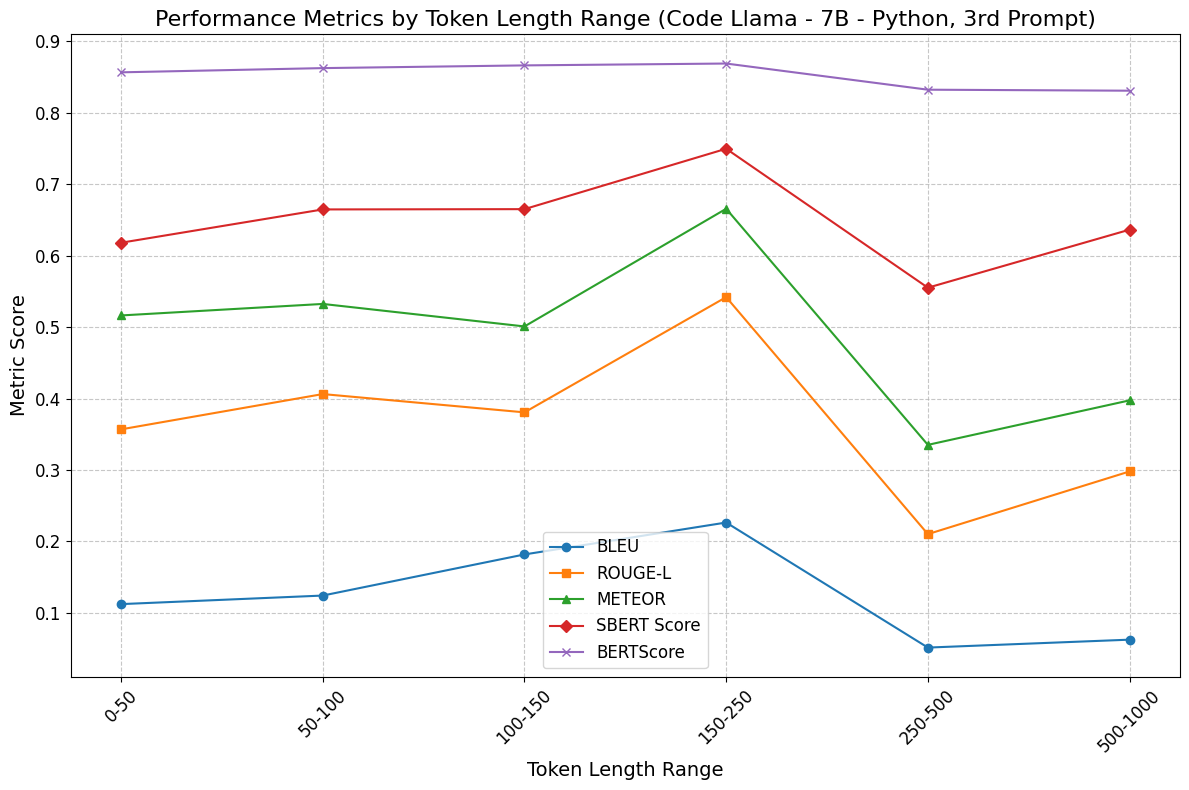

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Define the ranges and metrics
ranges = [
    "0-50",
    "50-100",
    "100-150",
    "150-250",
    "250-500",
    "500-1000",
]

bleu = [
    0.11235997649258987,
    0.12432891173413638,
    0.1818483444951722,
    0.22650184358877673,
    0.051557595249914975,
    0.06263225470073021,
]

rouge_l = [
    0.35684195367386073,
    0.4062033495150421,
    0.38061904876400077,
    0.5418231160312441,
    0.2102733959927347,
    0.2979623303930693,
]

meteor = [
    0.5161842153277629,
    0.5322962038870298,
    0.5008105723789418,
    0.6654293149458621,
    0.3351325440509277,
    0.39738376977009476,
]

sbert = [
    0.6179,
    0.6645,
    0.6649,
    0.7494,
    0.5550,
    0.6362,
]

bertscore = [
    0.8563,
    0.8622,
    0.8660,
    0.8686,
    0.8320,
    0.8306,
]

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(ranges, bleu, marker='o', label="BLEU")
plt.plot(ranges, rouge_l, marker='s', label="ROUGE-L")
plt.plot(ranges, meteor, marker='^', label="METEOR")
plt.plot(ranges, sbert, marker='D', label="SBERT Score")
plt.plot(ranges, bertscore, marker='x', label="BERTScore")

plt.title("Performance Metrics by Token Length Range (Code Llama - 7B - Python, 3rd Prompt)", fontsize=16)
plt.xlabel("Token Length Range", fontsize=14)
plt.ylabel("Metric Score", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()